## Libraries

In [7]:
import numpy as np             #for array
import pandas as pd            #for table
import matplotlib.pyplot as plt       # visualizing data
%matplotlib inline
import seaborn as sns

## Read the Dataset

In [8]:
df = pd.read_csv('Expanded_data_with_more_features.csv', encoding= 'unicode_escape')
# to avoid encoding error, always use "unicode_escape"

In [9]:
df.shape
#provides information about the number of rows and columns in a DataFrame

(30641, 15)

In [10]:
df.head()
#returns a specified number of rows, string from the top as well as column name

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [11]:
df.describe()
#returns description of the data in the DataFrame

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [12]:
df.info()
#provides a concise summary of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [13]:
#check for null values
pd.isnull(df).sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

## Data Cleaning

In [14]:
#drop unrelated/blank columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
pd.isnull(df).sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

## Exploratory Data Analysis

### Gender Distribution

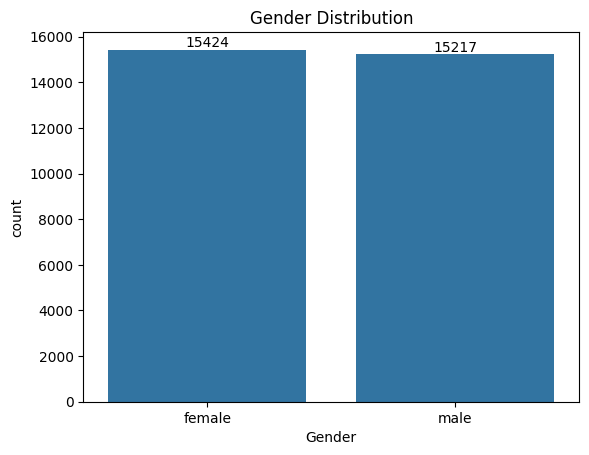

<Figure size 400x400 with 0 Axes>

In [19]:
# plotting a bar chart for Gender and it's count
plt.title("Gender Distribution")
ax = sns.countplot(x = 'Gender',data = df)
plt.figure(figsize=(4,4))

for bars in ax.containers:           # useing this to display the number/count above each bar  
    ax.bar_label(bars)


**From the above bar chart, we have Analyzed that in the Dataframe, No. of Female is more than no. of males** 

### Parents Education vs Students's Marks

In [22]:
##let us see if Parents Education is affecting in Student's Exam Mark

gb= df.groupby("ParentEduc").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'}) 

##groupby() used to split the data into groups based on some criteria
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


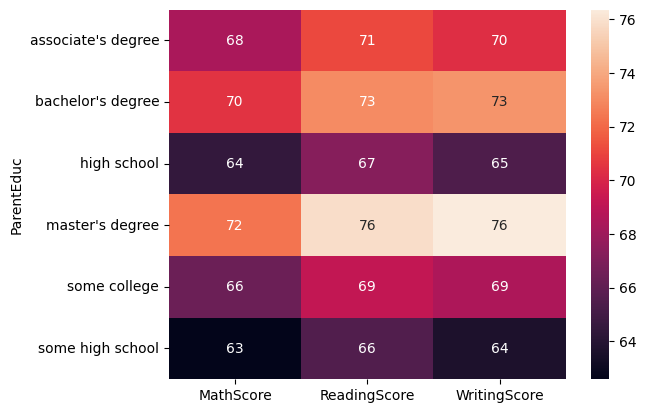

In [23]:
sns.heatmap(gb,annot=True)
plt.show()

**from the above chart we can see that the education of parents has a significant impact on their children's performace**

In [24]:
##let us see  Study hours is affecting in Student's Exam Mark

gb= df.groupby("WklyStudyHours").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'}) 

##groupby() used to split the data into groups based on some criteria
print(gb)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


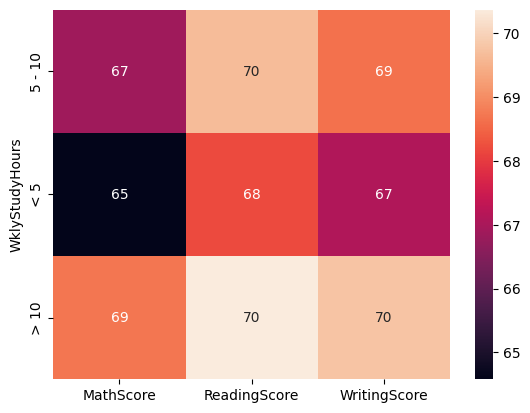

In [25]:
sns.heatmap(gb,annot=True)
plt.show()

**from above analysis we can see that Weekly study hours doesnot have much affect on student's marks**

### Distribution of Enthic Groups